In [1]:
import pandas as pd
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

Concatenate datasets

In [2]:
df = pd.read_csv("./../data/raw/emails.csv")
df['body'] = df['text']
df['label'] = df['spam']
df1 = df[['body', 'label']]

In [3]:
df = pd.read_csv("./../data/raw/spam_ham_dataset.csv")
df['body'] = df['text']
df['label'] = df['label_num']
df2 = df[['body', 'label']]

In [4]:
df = pd.concat([df1,df2], ignore_index=True)

In [5]:
lst_standard_datasets = ["CEAS_08.csv", "Enron.csv", "Ling.csv", "Nazario_5.csv", "Nigerian_5.csv", "SpamAssasin.csv", "TREC_07.csv"]

In [6]:
for dataset in lst_standard_datasets:
    df = pd.concat([df, pd.read_csv("./../data/raw/"+dataset)[['body','label']]], ignore_index=True)

Cleaning & Preprocessing

In [7]:
def cleaning(text):

    # Ensure correct data type
    text = str(text) 

    # Lowercasing
    text = text.lower()
    
    text = re.sub(r'^(from|to|cc|bcc|subject|sent|date):.*?\n', '', text, flags=re.MULTILINE | re.IGNORECASE) # Remove email headers
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"^(subject: re :|subject:)\s*", "", text) # Remove repetitive words
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only alphabets and spaces (removes non-Latin characters like Chinese, Korean)
    text = re.sub("\n", " ", text) # Remove new line indicator
    text = re.sub(r'\s+', ' ', text).strip() # Remove excessive whitespace

    return text

def get_language(text):
    try:
        cleaned_text = str(text).strip()
        if not cleaned_text:
            return 'empty' 
        lang = detect(cleaned_text)
        return lang
    
    except LangDetectException:
        # cannto detect language
        return 'unknown'
    
    except Exception as e:
        # in case of unexpected error
        return 'error'

In [8]:
df['cleaned_body'] = df['body'].apply(cleaning)
df['language'] = df['cleaned_body'].apply(get_language)

In [9]:
df['label'].value_counts() #roughly same proportion of spam & non-spam

label
0    76484
1    75157
Name: count, dtype: int64

In [10]:
df_ENG = df[df['language'] == "en"];df_ENG

,body,label,cleaned_body,language
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identity...,en
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merrill ...,en
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting to...,en
3,Subject: 4 color printing special request add...,1,color printing special request additional info...,en
4,"Subject: do not have money , get software cds ...",1,do not have money get software cds from here s...,en
...,...,...,...,...
151636,\n\n\n\nWhile we may have high ...,1,while we may have high expectations of our ass...,en
151637,\n\n\n\nWhile we may have high ...,1,while we may have high expectations of our ass...,en
151638,"For those who are interested, I just cook a li...",0,for those who are interested i just cook a lit...,en
151639,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan...",0,hello as i wrote i call sqlfetchchanneltstudie...,en


In [11]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
#Preprocess
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    '''
    1. lowercase
    2. remove links & numbers & "\n" & "Subject:" related words at the start of the sentence
    3. tokenize
    4. remove stopwards
    5. lemmatize
    '''

    # Ensure correct data type
    text = str(text) 

    # Lowercasing
    text = text.lower()
    
    # Remove special characters, links, and numbers
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only alphabets and spaces
    text = re.sub("\n", " ", text) # Remove new line indicator
    text = re.sub(r"^(Subject: re :|Subject:)\s*", "", text) # Remove repetitive words
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

# Apply preprocessing
df_ENG['tokens'] = df_ENG['body'].apply(preprocess)
    

C:\Users\huiqi\AppData\Local\Temp\ipykernel_15960\3097118748.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ENG['tokens'] = df_ENG['body'].apply(preprocess)


In [13]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\huiqi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\huiqi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\huiqi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\huiqi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\huiqi\AppData\Roaming\nltk_data...
[

True

In [14]:
from gensim.models import Word2Vec


c:\Python312\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Hypothesis 1 – Contextual Semantics: The semantic meaning of words differs depending on their contextual usage in spam versus non-spam messages. 
   

To investigate this hypothesis, we examine a few target words frequently observed in spam emails. We shall first train a word2vec model for each context (spam & non-spam) to compare them for analysis.


In [15]:
# Train Word2Vec model on spam
df_spam = df_ENG[df_ENG['label'] == 1]
w2v_model_spam = Word2Vec(sentences=df_spam['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Check vocabulary size
print("Vocabulary Size:", len(w2v_model_spam.wv))

Vocabulary Size: 292085


In [16]:
# Train Word2Vec model on non-spam
df_nonspam = df_ENG[df_ENG['label'] == 0]
w2v_model_nonspam = Word2Vec(sentences=df_nonspam['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Check vocabulary size
print("Vocabulary Size:", len(w2v_model_nonspam.wv))

Vocabulary Size: 325068


The following 2 code segments list out the top 10 words that are most similar to the word given to the function.

To better visualize the results, we generate a t-SNE by projecting high-dimensional contextual embeddings into a two-dimensional space. This allows us to qualitatively assess whether the same word exhibits different semantic patterns when used in spam versus non-spam contexts. The closer the data points are to each other, the more semantically similar the words represented by the data points are. 

In [17]:
print(w2v_model_spam.wv.most_similar("claim"))
print(w2v_model_nonspam.wv.most_similar("claim"))

[('documentation', 0.587471067905426), ('beneficiary', 0.5638445615768433), ('inheritance', 0.5634326934814453), ('verification', 0.5430871248245239), ('claimantbeneficiary', 0.5360383987426758), ('judgment', 0.5258865356445312), ('prize', 0.5210437178611755), ('deduction', 0.5133398175239563), ('ownership', 0.5125954747200012), ('claimed', 0.5082607269287109)]
[('alleged', 0.7016200423240662), ('claimed', 0.6987969875335693), ('discrimination', 0.6828736662864685), ('appeal', 0.6800714135169983), ('riaa', 0.678195059299469), ('criminal', 0.6700126528739929), ('ruling', 0.6679658889770508), ('judge', 0.6660618782043457), ('defendant', 0.663954496383667), ('violation', 0.6635019779205322)]


In [18]:
# Find words most similar to "free". see if there's any difference
print(w2v_model_spam.wv.most_similar("free"))
print(w2v_model_nonspam.wv.most_similar("free"))

[('package', 0.5422380566596985), ('plus', 0.5400237441062927), ('complimentary', 0.5316252708435059), ('guide', 0.5186389088630676), ('today', 0.5037981867790222), ('officexp', 0.4912645220756531), ('usat', 0.4836520254611969), ('learn', 0.4830430746078491), ('lead', 0.4772677421569824), ('fffree', 0.4729740619659424)]
[('complimentary', 0.4998115599155426), ('dateswith', 0.489851713180542), ('reward', 0.4867371916770935), ('freedom', 0.48039981722831726), ('entitles', 0.47628331184387207), ('downloads', 0.4616612493991852), ('gift', 0.46080103516578674), ('spech', 0.4580419659614563), ('contenthungry', 0.45693233609199524), ('shopping', 0.44800370931625366)]


We expect that the word2vec model trained on only spam will use the word "claim" in the context of obtaining an exclusive item or large sum of money, while the word2vec model trained on non-spam will use the word "claim" in other ways, possibly with the meaning of making an assumption or any other meaning.

Additionally, we expect that the w2v model trained on only spam will use the word "free" in the sense of obtaining goods without any monetary cost, while the w2v model for non-spam will use the word "free" in another meaning, such as referring to whether a person is available at a particular time period.

The results obtained neither confirms nor deny our hypothesis and we shall proceed to part 2 to come to a conclusive result.

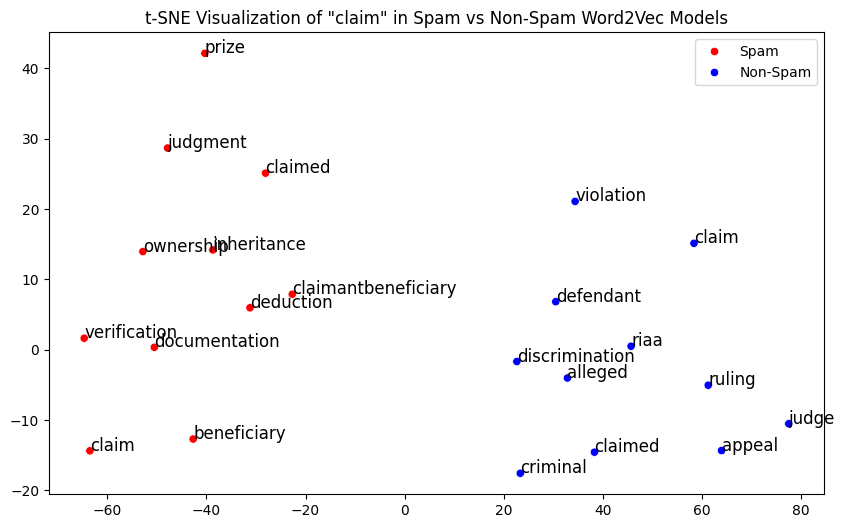

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Define words to visualize
target_word = "claim"
words_spam = [word for word, _ in w2v_model_spam.wv.most_similar(target_word, topn=10)]
words_non_spam = [word for word, _ in w2v_model_nonspam.wv.most_similar(target_word, topn=10)]

# Get vectors from both models
words = [target_word] + words_spam + [target_word] + words_non_spam
vectors = [w2v_model_spam.wv[word] for word in [target_word] + words_spam] + \
          [w2v_model_nonspam.wv[word] for word in [target_word] + words_non_spam]

# Convert to NumPy array
vectors = np.array(vectors)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

# Ensure labels match the number of points
labels = ['Spam'] * (len(words_spam) + 1) + ['Non-Spam'] * (len(words_non_spam) + 1)

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1], hue=labels, palette={'Spam': 'red', 'Non-Spam': 'blue'})

# Annotate words
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.title(f't-SNE Visualization of "{target_word}" in Spam vs Non-Spam Word2Vec Models')
plt.show()


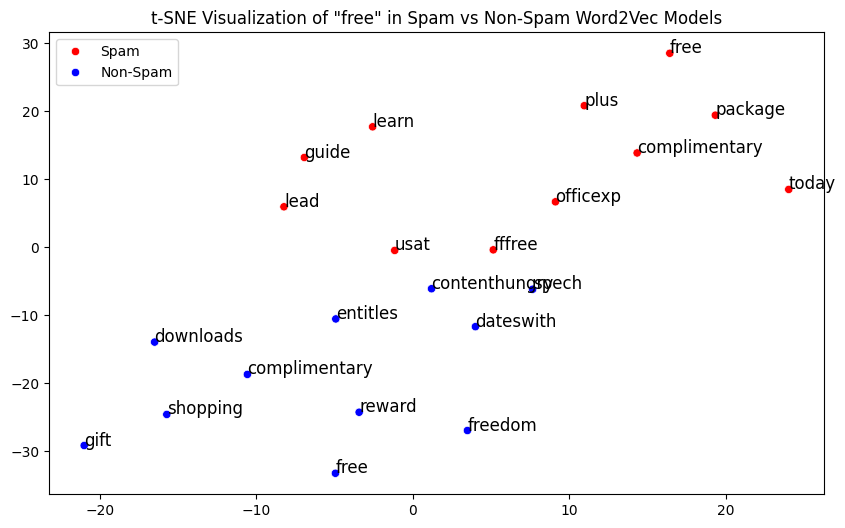

In [20]:
# Define words to visualize
target_word = "free"
words_spam = [word for word, _ in w2v_model_spam.wv.most_similar(target_word, topn=10)]
words_non_spam = [word for word, _ in w2v_model_nonspam.wv.most_similar(target_word, topn=10)]

# Get vectors from both models
words = [target_word] + words_spam + [target_word] + words_non_spam
vectors = [w2v_model_spam.wv[word] for word in [target_word] + words_spam] + \
          [w2v_model_nonspam.wv[word] for word in [target_word] + words_non_spam]

# Convert to NumPy array
vectors = np.array(vectors)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

# Ensure labels match the number of points
labels = ['Spam'] * (len(words_spam) + 1) + ['Non-Spam'] * (len(words_non_spam) + 1)

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1], hue=labels, palette={'Spam': 'red', 'Non-Spam': 'blue'})

# Annotate words
for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.title(f't-SNE Visualization of "{target_word}" in Spam vs Non-Spam Word2Vec Models')
plt.show()